<a href="https://colab.research.google.com/github/ravi-prakash1907/Cryptology/blob/main/Practicals/notebooks/bruteForceFact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Required Libraries



In [50]:
from time import time
from math import sqrt
import matplotlib.pyplot as plt

### Factorization

#### List all Factor Combinations

In [51]:
# for positive numbers only
def factorize(num):
  main = []
  root = int(sqrt(num))
  
  for i in range(2, root+1):
    if num % i == 0:
      main.append([i, num//i])
      endFc = factorize(num//i)

      if endFc == num//i:
        continue
      else:
        for fc in endFc:
          fc.insert(0,i)
          fc.sort()
          main.append(fc)
  
  return num if main == [] else main
  

In [52]:
factorize(12)

[[2, 6], [2, 2, 3], [3, 4], [2, 2, 3]]

##### List all **UNIQUE** Factor Combinations

In [53]:
def factorization(num): 
  ####  to print all combinations of the factors
  universal = [1, num]
  factors = factorize(num)

  if factors == num:
    return universal
  else:
    factors.insert(0,universal)
    temp = factors[:]
    new = []
    
    for pos in range(len(factors)):
      if factors[pos] in factors[pos+1:]:
        temp.remove(factors[pos])
    factors = temp

  return factors

In [54]:
factorization(12)

[[1, 12], [2, 6], [3, 4], [2, 2, 3]]

#### List all Factors

In [55]:
def getFactors(num):
  main = [1]
  root = int(sqrt(num))
  
  for i in range(2, root+1):
    if num % i == 0:
      main.extend([i, num//i])
      endFc = getFactors(num//i)

      if endFc[0] == num//i:
        continue
      else:
        for fc in endFc:
          #fc.extend([i])
          #fc.sort()
          main.extend([fc])
  
  main.append(num)
  main = list(set(main))
  return main

In [56]:
getFactors(12)

[1, 2, 3, 4, 6, 12]

 ## Driver Code for Automatic Input Generation

In [ ]:
def getBySquare(num, exp):
  n = num**(exp+1)
  min = 10**(exp)
  max = 10**(exp+1)

  while not (n >= min and n < max):
    n *= 10
  return n

##########################################
def get10Pow(num, deg):
  coff = 10**(deg)
  n = num*coff
  return n

##########################################
def getNumRep(num, deg):
  if deg is 0:
    return num
  else:
    newNum = num*10 + (num%10)
    return getNumRep(newNum, deg-1)

In [153]:
def driveForNNum():
  numOfDigit = int(input("Upto how many number of digits? "))
  num = int(input("Enter a single digit number: "))
  print("\n")
  if num > 9:
    num = num%10 if num%10 != 0 else num//10  

  for fun in range(3):
    if fun == 0:
      selector = get10Pow
      deg = numOfDigit
    elif fun == 1:
      selector = getNumRep
      deg = (numOfDigit*3)//4
    else:
      selector = getBySquare
      deg = (numOfDigit*2)//3
    
    numbers = []
    for i in range(deg):
      n = selector(num, i)
      numbers.append(n)

      startTime = time()
      factors = getFactors(n)
      endTime = time()
      exeTime = endTime - startTime

      #print("Time talen to find factors of {} is : {}".format(i, exeTime))
      plt.plot(i+1, exeTime, c='#f16a70', marker='P')
      plt.xlabel("Number of Digits in Number")
      plt.ylabel("Time taken to find factors (in seconds)")
    
    print("Numbers for factor: ",numbers)
    plt.show()


Upto how many number of digits? 9
Enter a single digit number: 2


Numbers for factor:  [2, 20, 200, 2000, 20000, 200000, 2000000, 20000000, 200000000]


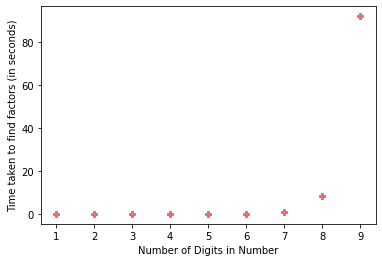

Numbers for factor:  [2, 22, 222, 2222, 22222, 222222]


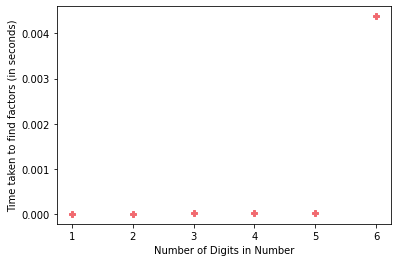

Numbers for factor:  [2, 40, 800, 1600, 32000, 640000]


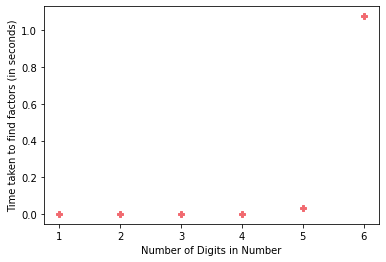

In [154]:
driveForNNum()